<a href="https://colab.research.google.com/github/james-lucius/qureca_ADEQUATE/blob/main/M3_221_Deutsch_Jozsa_Algorithm_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://gitlab.com/qworld/qeducation/educational-materials/adequate-qbook1/raw/main/qworld/images/adq_1.png" align="left" width=450></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $


_prepared by Berat Yenilen, Utku Birkan, Arda Çınar, Cenk Tüysüz and Özlem Salehi_

<font size="28px" style="font-size:28px;" align="left"><b>Exercise: Deutsch-Jozsa Algorithm </b></font>
<br>
<br><br>

##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

path_files = "./" if in_colab() else "../qworld/include/"

SolutionToTask3 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1R4H5rzin4L0a_QGWoJIpK1GxVyiwMQpa#scrollTo=I4kDR5nNfhLm' if in_colab() else 'Deutsch_Jozsa_Algorithm_Solutions.ipynb#task3')))
SolutionToTask4 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1R4H5rzin4L0a_QGWoJIpK1GxVyiwMQpa#scrollTo=5K__MmD9fhLm' if in_colab() else 'Deutsch_Jozsa_Algorithm_Solutions.ipynb#task4')))
SolutionToTask5 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1R4H5rzin4L0a_QGWoJIpK1GxVyiwMQpa#scrollTo=1_I1XmUNfhLn' if in_colab() else 'Deutsch_Jozsa_Algorithm_Solutions.ipynb#task5')))

if in_colab():
    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/oracle.py"
    !wget --no-cache -O oracle.py {url}

    !pip install qiskit[visualization]==0.43.3
    !pip install qiskit-aer

--2025-06-14 00:14:10--  https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/oracle.py
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3128 (3.1K) [text/plain]
Saving to: ‘oracle.py’

oracle.py           100%[===================>]   3.05K  --.-KB/s    in 0s      

2025-06-14 00:14:10 (43.8 MB/s) - ‘oracle.py’ saved [3128/3128]



#<h3>Task 1</h3>

Apply $H^{\otimes 4}$ to $\ket{15}$. What is the result?

<h3>Task 2 (Optional)</h3>

Prove the following theorem for registers with arbitrary length.

$$  H^{\otimes n} \ket{x} =  \frac{1}{\sqrt{2^n}} \sum_{z=0}^{2^n-1}(-1)^{x \cdot z}\ket{z}$$


<h3>Task 3 (Discussion)</h3>

- How many times do we need to use the oracle $f$, if we want to solve this problem clasically, in the worst case?

- How many times do you think we will use the oracle $f$ while solving it with a quantum computer?

To check out our solution, run the next cell:

In [ ]:
SolutionToTask3()  # show solution for task 3

<IPython.core.display.Javascript object>

<h3>Task 4</h3>

You are given an oracle function called `oraclej(n)`, which returns a random quantum circuit with `n+1` qubits corresponding to a constant or balanced fuction. `oraclej(n)` represents the $U_f$ in our algorithm.

Let $n=4$. Implement the proposed algorithm to decide whether or not $f$ is constant or even. Note that qubit 4 is the output qubit.

(Note: You should be able the see the circuit structure of $U_f$, if you draw your circuit. Can you check whether your result is correct or not by looking at this circuit?)

Don't forget to run the following cell to load the oracle function.

In [2]:
quantum_file = path_files+"oracle.py"
%run $quantum_file

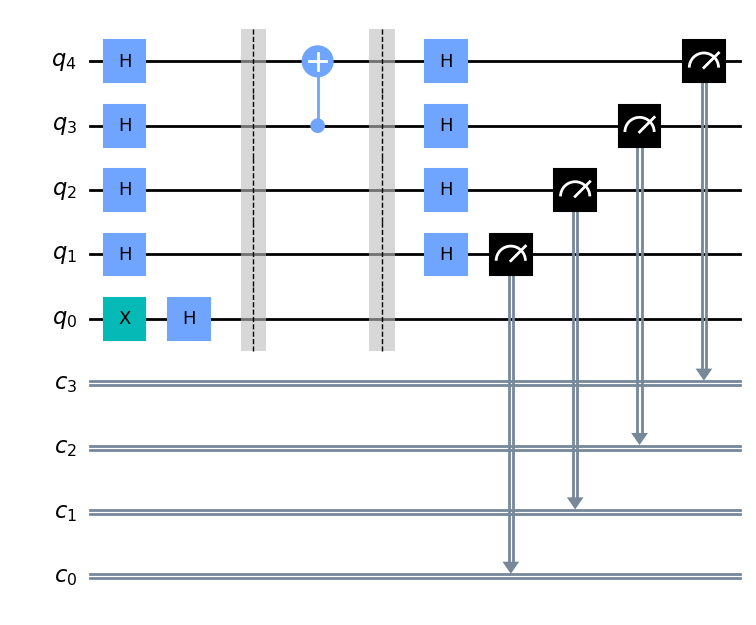

In [6]:
import random
from qiskit import QuantumCircuit, execute, Aer

dj_circuit = QuantumCircuit(5, 4)

#Your code here
dj_circuit.x(0)
for i in range(5): dj_circuit.h(i)
dj_circuit.compose(oraclej(4), inplace = True)
for i in range(4): dj_circuit.h(i + 1)
for i in range(4): dj_circuit.measure(i + 1, i)

dj_circuit.draw(output='mpl', reverse_bits = True)

In [7]:
job = execute(dj_circuit, Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts()
print(counts)

{'0000': 10000}


To check out our solution, run the next cell:

In [ ]:
SolutionToTask4()  # show solution for task 4

<IPython.core.display.Javascript object>

<h3>Task 5</h3>

Write two functions `balanced(n)` and `constant(n)` to randomly generate quantum circuits with $n+1$ qubits that implement a function $ f : \{0, 1\}^n \rightarrow \{0, 1\} $ such that $f$ is either constant or balanced.

Note that qubit $n$ is the output qubit.

In [8]:
import random
from qiskit import QuantumCircuit, execute, Aer

def balanced(n):
    circuit = QuantumCircuit(n+1)
    circuit.barrier()
    # ... generate balanced circuit here
    circuit.cx(0, n)
    circuit.barrier()
    return circuit

def constant(n):
    circuit = QuantumCircuit(n+1)
    circuit.barrier()
    # ... generate constant circuit here
    circuit.barrier()
    return circuit

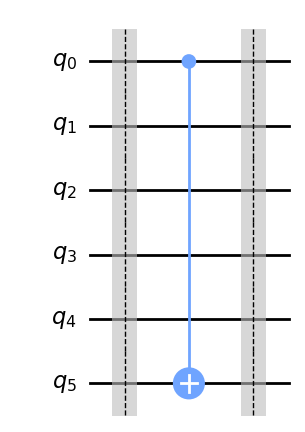

In [9]:
n=5
balanced(n).draw(output='mpl')

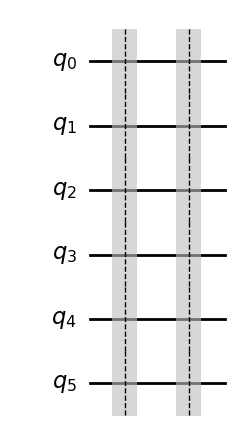

In [10]:
n=5
constant(n).draw(output='mpl')

To check out our solution, run the next cell:

In [ ]:
SolutionToTask5()  # show solution for task 5

<IPython.core.display.Javascript object>